## Analyzing ICO of Cryptocurrencies
In this project, we'll analyze ICO of some unique cryptocurrencies. An ICO (Initial Coin Offering) is like a crowdfunding campaign for cryptocurrency projects. ICOs became popular because they allow startups to raise funds quickly and directly from supporters all over the world, without the need for intermediaries. Here we will analyze the coins based on their types, uses cases and platforms.

For this project, we will use ICO Cryptocurrency Dataset found in Kaggle. We will download it using opendatasets library and analyze the data present in it

In [3]:
import pandas as pd
ico_raw_data=pd.read_csv('./ico.csv')
ico_raw_data

,Unnamed: 0,coin_ticker,received_money,sold_coins,role_of_token,category,goal,total_tokens,interest,fundraising_goal,...,ico_token_price,received_money.1,end_date,token_type,available_for_token_sale,min_max_personal_cap,whitelist,accepts,token_issue,cant_participate
0,0,Ozone Metaverse,"$1,430,000","$1,430,000 (100%)",Utility,Platform,"$1,430,000","2,000,000,000",Not Rated,"$280,000",...,1 OZONE = 0.007 USD,"$1,430,000",Ended: 6 Jul 2023,Flow,"21,25%",NaN,NaN,NaN,NaN,NaN
1,1,TypeIT,Pending,NaN,Utility,Blockchain Service,Pending,"1,000,000,000",Not Rated,"22,000,000 Token",...,1 TYPE = 0.05 USD,Pending,Ended: 6 Jul 2023,ERC20,NaN,NaN,NaN,NaN,NaN,NaN
2,2,EGO (Paysenger),"$4,160,000","$4,160,000 (100%)",Utility,Social Network,"$4,160,000","500,000,000",Not Rated,"$859,000",...,1 EGO = 0.06 USD,"$4,160,000",Ended: 5 Jul 2023,BEP-20,26.6%,100$ / 2500$,"Yes (until 24 May,","ETH, USDT, USDC, DOT",NaN,"Afghanistan, Burundi, Central African Republic..."
3,3,Goracle,"$3,725,000","$3,730,000 (100%)",Utility,Blockchain Service,"$3,730,000",NaN,Not Rated,NaN,...,NaN,"$3,725,000",Ended: 5 Jul 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,BIDSHOP,"$250,000",NaN,Utility,DeFi,Not Set,NaN,Not Rated,NaN,...,NaN,"$250,000",Ended: 30 Jun 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12375,12375,Sommelier,"$26,500,000",NaN,Utility,Blockchain Service,Not Set,NaN,Not Rated,NaN,...,NaN,"$26,500,000",\t\tDATE: TBA\t\t,ERC20,NaN,NaN,NaN,NaN,NaN,NaN
12376,12376,Swivel Finance,"$4,650,000",NaN,Utility,Lending,Not Set,NaN,Not Rated,NaN,...,NaN,"$4,650,000",\t\tDATE: TBA\t\t,ERC20,NaN,NaN,NaN,NaN,NaN,NaN
12377,12377,CoinFLEX,"$11,250,000",NaN,Utility,Platform,Not Set,"100,000,000",Not Rated,ETH,...,1 FLEX = 0.43 USD,"$11,250,000",\t\tDATE: TBA\t\t,ERC20,NaN,NaN,NaN,NaN,NaN,NaN
12378,12378,MetaMask,Pending,NaN,Utility,Wallet,Pending,NaN,Not Rated,NaN,...,NaN,Pending,\t\tDATE: TBA\t\t,ERC20,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preparation and Cleaning

The data obtained from the csv file contains various information. We will work with the following areas in this analysis.

- Received and Targeted Funds
- Roles of coin and Category of projects

So in this section, we will prepare our dataset based on the areas of our interest and clean them for further analyzing.

Here first of all we need to convert the currency values to plain integers in order to make our further analysis more convenient. In order to do that, we created a function `extract` to simply remove all symbols and delimeters and used `to_numeric` function later on to convert to integer

In [8]:
def extract(string):
    li=[i for i in str(string) if ('0'<=i<='9' )]
    return (''.join(li))

In [9]:
selected_columns = ['coin_ticker','received_money','role_of_token','category','interest','fundraising_goal','token_type']
ico_data=ico_raw_data[selected_columns].copy()
ico_data['received_money']=ico_data['received_money'].apply(extract).apply(pd.to_numeric, errors='coerce')
ico_data['fundraising_goal']=ico_data['fundraising_goal'].apply(extract).apply(pd.to_numeric, errors='coerce')

Now we need to omit the rows that has pending ICO

In [10]:
ico_data.drop(ico_data[ico_data.received_money.isna()].index, inplace=True)
ico_data

,coin_ticker,received_money,role_of_token,category,interest,fundraising_goal,token_type
0,Ozone Metaverse,1430000.0,Utility,Platform,Not Rated,280000.0,Flow
2,EGO (Paysenger),4160000.0,Utility,Social Network,Not Rated,859000.0,BEP-20
3,Goracle,3725000.0,Utility,Blockchain Service,Not Rated,NaN,NaN
4,BIDSHOP,250000.0,Utility,DeFi,Not Rated,NaN,NaN
5,Tectum,4202573.0,Utility,Blockchain,Not Rated,NaN,NaN
...,...,...,...,...,...,...,...
12374,dTrade,22800000.0,Utility,Exchange,Not Rated,NaN,Polkadot
12375,Sommelier,26500000.0,Utility,Blockchain Service,Not Rated,NaN,ERC20
12376,Swivel Finance,4650000.0,Utility,Lending,Not Rated,NaN,ERC20
12377,CoinFLEX,11250000.0,Utility,Platform,Not Rated,NaN,ERC20


In [11]:
ico_data.describe()

,received_money,fundraising_goal
count,1.029000e+04,1.888000e+03
mean,7.867958e+08,5.773453e+07
std,1.417500e+10,3.300583e+08
min,3.000000e+04,2.000000e+04
25%,2.670000e+06,2.700000e+05
50%,5.750000e+06,8.250000e+05
75%,1.640000e+07,4.500000e+06
max,3.770000e+11,3.000000e+09


## Exploratory Analysis and Visualization

Now the data is clean, let's do some visualization. We will visualize some basic information here and try to find some useful insights of cryotocurrency ICOs


Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 1) Funds Raised by Projects

In [13]:
len(ico_data.coin_ticker.unique())

447

As we can see, there are 447 projects which indicates repeated entry for many projects.

In [14]:
ico_groupby_project=ico_data.groupby(ico_data.coin_ticker).first()
ico_groupby_project.drop(columns=['role_of_token','category','interest','token_type'], inplace=True)
ico_groupby_project_sorted=ico_groupby_project.sort_values('received_money', ascending=False).head(10)
ico_groupby_project_sorted

,received_money,fundraising_goal
coin_ticker,,
Cere Network,3.770000e+11,NaN
Republic Note,4.900000e+10,NaN
Gods Unchained,2.532000e+10,35000000.0
Wink,1.600000e+10,NaN
Band Protocol,1.085000e+10,NaN
Blockstack,8.050000e+09,NaN
Perlin,6.700000e+09,NaN
Ultra,5.000000e+09,NaN
Ampleforth,4.999234e+09,NaN


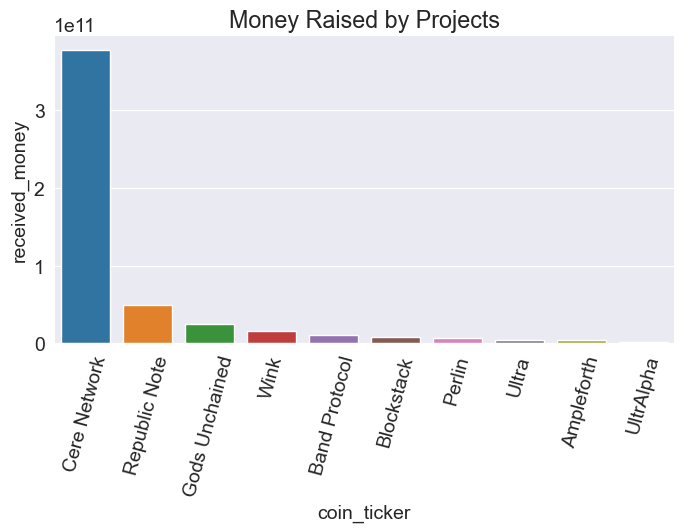

In [16]:
plt.figure(figsize=(8,4))
plt.title('Money Raised by Projects')
plt.xticks(rotation=75)
sns.barplot(x=ico_groupby_project_sorted.index, y=ico_groupby_project_sorted.received_money);

From this visualization, we can conclude that Cere Network raised funds higher than any other projects valued at 377 Billion